In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
data=pd.read_csv(r"C:\Users\Home\Downloads\dataframe_.csv",skipinitialspace=True)

In [3]:
data

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [4]:
data.shape

(1697, 2)

## Checking for duplicates

In [5]:
data[data.duplicated()]

,input,output
106,-63.366669,-33.000000
464,112.633331,103.000000
715,-31.366669,-49.000000
819,-117.366669,-75.000000
865,-131.366669,-125.000000
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [6]:
data.drop_duplicates(inplace=True)## dropped the duplicated values

In [7]:
data

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1107,-119.954237,123.609122
1108,-109.942155,127.197394
1109,-111.515368,128.170885
1110,-110.344221,123.087950


## Checking for the missing values

In [8]:
data.isna().sum()

input     1
output    1
dtype: int64

In [9]:
data.input.median()
data.input.mean()

17.462087345

8.116185427163302

In [10]:
x=data.input.median()
data.input.fillna(x,inplace=True) ## filling the input column nan with the median value 

In [11]:
data.output.median()
data.output.mean()

-46.30093846

-27.383628220210085

In [12]:
x=data.output.median()
data.output.fillna(x,inplace=True) ## filling the output column nan with the median value 

In [13]:
data.info() #there are no misssing values in data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1091 entries, 0 to 1439
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1091 non-null   float64
 1   output  1091 non-null   float64
dtypes: float64(2)
memory usage: 25.6 KB


## Outliers detection

In [14]:
data.skew()

input    -0.284121
output    0.923302
dtype: float64

<AxesSubplot:xlabel='input'>

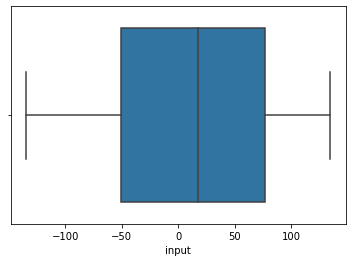

In [15]:
sns.boxplot(data.input) # input column as no outliers 

<AxesSubplot:xlabel='output'>

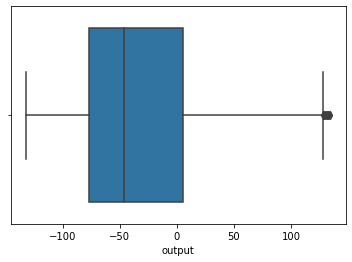

In [16]:
sns.boxplot(data.output) # output column as the outlier 

In [17]:
Q1,Q2,Q3=((data.output).quantile(q=[0.25,0.50,0.75]))
print(Q1,Q2,Q3)

-76.9885951 -46.30093846 5.0754008045


In [18]:
IQR=Q3-Q1
UL=Q3+(1.5)*IQR
LL=Q1-(1.5)*IQR

print(IQR,LL,UL)

82.0639959045 -200.08458895675 128.17139466125


In [19]:
data[(data.output > UL) | (data.output < LL)].index.value_counts()

355     1
1071    1
1088    1
1086    1
1085    1
1081    1
1073    1
1072    1
1066    1
359     1
480     1
477     1
475     1
473     1
362     1
360     1
1090    1
dtype: int64

### cube root transformation

In [20]:
Q1,Q2,Q3=(((data.output)**(1/3)).quantile(q=[0.25,0.50,0.75]))
print(Q1,Q2,Q3)

3.449235919566488 4.3149026472604515 4.769256644105729


In [21]:
IQR=Q3-Q1
UL=Q3+(1.5)*IQR
LL=Q1-(1.5)*IQR

print(IQR,LL,UL)

1.320020724539241 1.4692048327576266 6.749287730914591


In [22]:
data[((data.output)**(1/3) > UL) | ((data.output)**(1/3) < LL)]

,input,output
300,82.896050,1.467981
405,94.824780,1.216252
411,73.465372,1.493731
530,94.286977,1.237683
534,84.237928,0.842715
1008,80.633331,2.000000


<AxesSubplot:xlabel='output'>

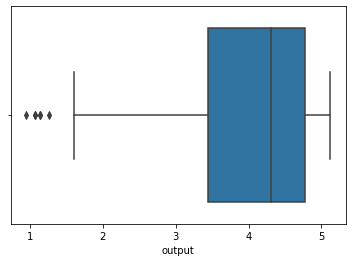

In [23]:
sns.boxplot((data.output)**(1/3))

## Logtransformation

In [24]:
Q1,Q2,Q3=(np.log(data.output)).quantile(q=[0.25,0.50,0.75])
print(Q1,Q2,Q3)

3.7144582017755075 4.386224288435067 4.686571358837536


In [25]:
IQR=Q3-Q1
UL=Q3+(1.5)*IQR
LL=Q1-(1.5)*IQR

print(IQR,LL,UL)

0.9721131570620289 2.256288466182464 6.14474109443058


In [26]:
data[((np.log(data.output))> UL) | ((np.log(data.output)) < LL)]

,input,output
300,82.896050,1.467981
306,84.633331,7.000000
307,84.775244,8.755985
398,58.916087,5.150802
399,71.036419,7.107772
404,80.633331,5.000000
405,94.824780,1.216252
411,73.465372,1.493731
414,80.214195,5.964164
528,84.096267,6.148041


<AxesSubplot:xlabel='output'>

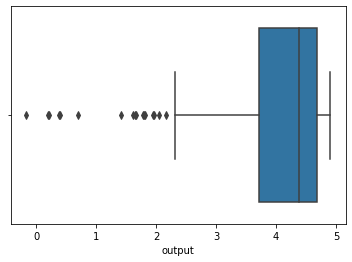

In [27]:
sns.boxplot(np.log(data.output))

In [28]:
## to reduce the outlier we use the transformation techinque  cube root reduces the outlier than the logtransformation 

In [29]:
output_cube=(data.output)**(1/3)

In [30]:
data["output_cube"]=(data.output)**(1/3)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1091 entries, 0 to 1439
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   input        1091 non-null   float64
 1   output       1091 non-null   float64
 2   output_cube  281 non-null    float64
dtypes: float64(3)
memory usage: 34.1 KB


In [32]:
## we cannot insert the nan  values tho the output_tran as there are more nan values in the column

## REMOVING THE OUTLIERS FROM DATA

In [33]:
## removing the outliers from the data

In [34]:
Q1,Q2,Q3=((data.output).quantile(q=[0.25,0.50,0.75]))
print(Q1,Q2,Q3)

-76.9885951 -46.30093846 5.0754008045


In [35]:
IQR=Q3-Q1
UL=Q3+(1.5)*IQR
LL=Q1-(1.5)*IQR

print(IQR,LL,UL)

82.0639959045 -200.08458895675 128.17139466125


In [36]:
temp_data=data[~(data.output > UL) | (data.output < LL)]

In [37]:
data[(data.output > UL) | (data.output < LL)].index.value_counts()

355     1
1071    1
1088    1
1086    1
1085    1
1081    1
1073    1
1072    1
1066    1
359     1
480     1
477     1
475     1
473     1
362     1
360     1
1090    1
dtype: int64

In [38]:
temp_data

,input,output,output_cube
0,-122.740667,-130.572085,NaN
1,-121.531419,-129.938929,NaN
2,-134.917019,-130.141832,NaN
3,-120.605951,-125.760932,NaN
4,-129.894781,-112.785214,NaN
...,...,...,...
1107,-119.954237,123.609122,4.981386
1108,-109.942155,127.197394,5.029129
1109,-111.515368,128.170885,5.041926
1110,-110.344221,123.087950,4.974375


In [39]:
X=temp_data[["input"]]
y=temp_data["output"]

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=2)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_rescaled=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns,
                             index=X_train.index)

In [42]:
X_test_rescaled=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns,index=X_test.index)

## ALGORITHMS

### LinearRegression

In [43]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train_rescaled,y_train)

LinearRegression()

In [44]:
y_test_pred=linear.predict(X_test_rescaled)

In [45]:
from sklearn import metrics
linear_abs=metrics.mean_absolute_error(y_test,y_test_pred)
linear_sqrt=metrics.mean_squared_error(y_test,y_test_pred)
linear_root=np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

### Decision tree

In [46]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(X_train_rescaled,y_train)

DecisionTreeRegressor()

In [47]:
y_test_pred=tree.predict(X_test_rescaled)

In [48]:
tree_abs=metrics.mean_absolute_error(y_test,y_test_pred)
tree_sqrt=metrics.mean_squared_error(y_test,y_test_pred)
tree_root=np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

### KNN

In [49]:
from sklearn.neighbors import KNeighborsRegressor
neighbors=KNeighborsRegressor()
neighbors.fit(X_train_rescaled,y_train)

KNeighborsRegressor()

In [50]:
y_test_pred=neighbors.predict(X_test_rescaled)

In [51]:
neighbors_abs=metrics.mean_absolute_error(y_test,y_test_pred)
neighbors_sqrt=metrics.mean_squared_error(y_test,y_test_pred)
neighbors_root=np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

### Ensemble(Random Forest)

In [52]:
from sklearn.ensemble import RandomForestRegressor
ensemble=RandomForestRegressor()
ensemble.fit(X_train_rescaled,y_train)

RandomForestRegressor()

In [53]:
y_test_pred=ensemble.predict(X_test_rescaled)

In [54]:
ensemble_abs=metrics.mean_absolute_error(y_test,y_test_pred)
ensemble_sqrt=metrics.mean_squared_error(y_test,y_test_pred)
ensemble_root=np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

### Ada boost

In [55]:
from sklearn.ensemble import AdaBoostRegressor
ada_boost=AdaBoostRegressor()
ada_boost.fit(X_train_rescaled,y_train)

AdaBoostRegressor()

In [56]:
y_test_pred=ada_boost.predict(X_test_rescaled)

In [57]:
ada_abs=metrics.mean_absolute_error(y_test,y_test_pred)
ada_sqrt=metrics.mean_squared_error(y_test,y_test_pred)
ada_root=np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

### Gradient

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_boost=GradientBoostingRegressor()
gradient_boost.fit(X_train_rescaled,y_train)

GradientBoostingRegressor()

In [59]:
y_test_pred=gradient_boost.predict(X_test_rescaled)

In [60]:
from sklearn import metrics
gra_abs=metrics.mean_absolute_error(y_test,y_test_pred)
gra_sqrt=metrics.mean_squared_error(y_test,y_test_pred)
gra_root=np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

In [61]:
data_withoutliers=pd.DataFrame({"Algorithms":["Linearregression","KNN","Decisontree","Randomforest","Adaboost","gradient_boost"],
    "mean_absolute":[linear_abs,neighbors_abs,tree_abs,ensemble_abs,ada_abs,gra_abs],
                     "mean_square":[linear_sqrt,neighbors_sqrt,tree_sqrt,ensemble_sqrt,ada_sqrt,gra_sqrt],
                     "mean_root_square":[linear_root,neighbors_root,tree_root,ensemble_root,ada_root,gra_root]})

In [62]:
data_withoutliers

,Algorithms,mean_absolute,mean_square,mean_root_square
0,Linearregression,40.352873,2465.133302,49.650109
1,KNN,20.284606,817.271270,28.587957
2,Decisontree,24.640307,1452.380045,38.110104
3,Randomforest,21.718397,979.993778,31.304852
4,Adaboost,25.842476,1198.079392,34.613283
5,gradient_boost,18.653870,713.104127,26.704010


## WITH OUTLIERS INTHE DATA

In [63]:
X=data[["input"]]
y=data["output"]

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=2)

In [65]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_rescaled=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns,
                             index=X_train.index)

In [66]:
X_test_rescaled=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns,index=X_test.index)

### ALGORITHMS

### LinearRegression

In [67]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train_rescaled,y_train)

LinearRegression()

In [68]:
y_test_pred=linear.predict(X_test_rescaled)

In [69]:
from sklearn import metrics
linear_abs=metrics.mean_absolute_error(y_test,y_test_pred)
linear_sqrt=metrics.mean_squared_error(y_test,y_test_pred)
linear_root=np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

### Decision tree

In [70]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(X_train_rescaled,y_train)

DecisionTreeRegressor()

In [71]:
y_test_pred=tree.predict(X_test_rescaled)

In [72]:
from sklearn import metrics
tree_abs=metrics.mean_absolute_error(y_test,y_test_pred)
tree_sqrt=metrics.mean_squared_error(y_test,y_test_pred)
tree_root=np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

### KNN

In [73]:
from sklearn.neighbors import KNeighborsRegressor
neighbors=KNeighborsRegressor()
neighbors.fit(X_train_rescaled,y_train)

KNeighborsRegressor()

In [74]:
y_test_pred=neighbors.predict(X_test_rescaled)

In [75]:
from sklearn import metrics
neighbors_abs=metrics.mean_absolute_error(y_test,y_test_pred)
neighbors_sqrt=metrics.mean_squared_error(y_test,y_test_pred)
neighbors_root=np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

### Ensemble(Randomforest)

In [76]:
from sklearn.ensemble import RandomForestRegressor
ensemble=RandomForestRegressor()
ensemble.fit(X_train_rescaled,y_train)

RandomForestRegressor()

In [77]:
y_test_pred=ensemble.predict(X_test_rescaled)

In [78]:
from sklearn import metrics
ensemble_abs=metrics.mean_absolute_error(y_test,y_test_pred)
ensemble_sqrt=metrics.mean_squared_error(y_test,y_test_pred)
ensemble_root=np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

### Ada_boost

In [79]:
from sklearn.ensemble import AdaBoostRegressor
ada_boost=AdaBoostRegressor()
ada_boost.fit(X_train_rescaled,y_train)

AdaBoostRegressor()

In [80]:
y_test_pred=ada_boost.predict(X_test_rescaled)

In [81]:
from sklearn import metrics
ada_abs=metrics.mean_absolute_error(y_test,y_test_pred)
ada_sqrt=metrics.mean_squared_error(y_test,y_test_pred)
ada_root=np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

### Gradient 

In [82]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_boost=GradientBoostingRegressor()
gradient_boost.fit(X_train_rescaled,y_train)

GradientBoostingRegressor()

In [83]:
y_test_pred=gradient_boost.predict(X_test_rescaled)

In [84]:
from sklearn import metrics
gra_abs=metrics.mean_absolute_error(y_test,y_test_pred)
gra_sqrt=metrics.mean_squared_error(y_test,y_test_pred)
gra_root=np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

In [85]:
data_outliers=pd.DataFrame({"Algorithms":["Linearregression","KNN","Decisontree","Randomforest","Adaboost","gradient_boost"],
    "mean_absolute":[linear_abs,neighbors_abs,tree_abs,ensemble_abs,ada_abs,gra_abs],
                     "mean_square":[linear_sqrt,neighbors_sqrt,tree_sqrt,ensemble_sqrt,ada_sqrt,gra_sqrt],
                     "mean_root_square":[linear_root,neighbors_root,tree_root,ensemble_root,ada_root,gra_root]})

In [86]:
data_outliers ##without removing the outlier the error is more 

,Algorithms,mean_absolute,mean_square,mean_root_square
0,Linearregression,43.337001,3058.959256,55.307859
1,KNN,24.655349,1514.579121,38.917594
2,Decisontree,27.592160,1901.510303,43.606310
3,Randomforest,25.401762,1547.500724,39.338286
4,Adaboost,29.757865,1738.016260,41.689522
5,gradient_boost,22.689665,1265.425229,35.572816


In [87]:
data_withoutliers ## after removing the outliers the error is less

,Algorithms,mean_absolute,mean_square,mean_root_square
0,Linearregression,40.352873,2465.133302,49.650109
1,KNN,20.284606,817.271270,28.587957
2,Decisontree,24.640307,1452.380045,38.110104
3,Randomforest,21.718397,979.993778,31.304852
4,Adaboost,25.842476,1198.079392,34.613283
5,gradient_boost,18.653870,713.104127,26.704010


### by the above dataa there are 17 outliers in the data if we remove the outliers the error score  is less compared to the data with outliers

### the output column as outliers .if we do transformation for the outlier column `cube root `transformation is best compared to the log transformation.but when we perform cube root transfotmation to outlier column 810 are of `nan` values 

### `` gradientboost`` is the least error  compared to all algorithms